In [1]:
import pandas as pd

In [2]:
#read the data and convert into dataframe using pandas

train=pd.read_csv("train.csv")

In [3]:
train.head()
print(train.shape)

(7613, 5)


In [4]:

test=pd.read_csv("test.csv")
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
train["target"].describe()

count    7613.00000
mean        0.42966
std         0.49506
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         1.00000
Name: target, dtype: float64

In [6]:
train.groupby('target').describe()

id                                                           \
         count         mean          std   min      25%     50%     75%   
target                                                                    
0       4342.0  5276.446338  3157.206802  23.0  2513.25  5243.5  8038.5   
1       3271.0  5661.608071  3097.094809   1.0  3104.50  5676.0  8252.0   

                 
            max  
target           
0       10848.0  
1       10873.0

In [7]:
train['target'].value_counts().plot(kind='bar')

In [8]:
#Let's make a new column to detect how long the reviews are
train['length'] = train['text'].apply(len)
train.head(50)

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,79
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

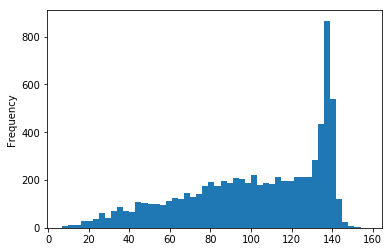

In [10]:
train['length'].plot(bins=50, kind='hist') 

In [11]:
train.length.describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

In [12]:
train[train['length'] == 157]['text'].iloc[0]

"when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????"

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002470BBD3588>,
      dtype=object)

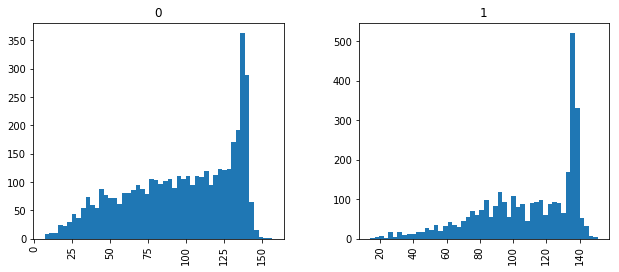

In [13]:
train.hist(column='length', by='target', bins=50,figsize=(10,4))

In [14]:
classes = train['target']
print(classes.value_counts())

0    4342
1    3271
Name: target, dtype: int64


In [15]:
train = train.drop(["length"], axis=1)

In [16]:
df=pd.concat([train,test])
df.shape

C:\Users\vibhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(10876, 5)

In [17]:
df.head()

,id,keyword,location,target,text
0,1,NaN,NaN,1.0,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,1.0,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,1.0,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,1.0,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,1.0,Just got sent this photo from Ruby #Alaska as ...


In [18]:
#to remove the Html tags like (br)
from bs4 import BeautifulSoup
df['text']=df['text'].apply(lambda x: BeautifulSoup(x,"html5lib").get_text())

In [19]:
import re
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [20]:
df['text']=df['text'].apply(lambda x : remove_URL(x))

In [21]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [22]:
df['text']=df['text'].apply(lambda x: remove_emoji(x))

In [23]:
text_comments = df["text"]

In [24]:
# use regular expressions to replace email addresses, URLs, phone numbers, other numbers

# Replace email addresses with 'email'
processed = text_comments.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumbr')
    
# Replace numbers with 'numbr'
processed = processed.str.replace(r'\d+(\.\d+)?', 'numbr')

In [25]:
print(text_comments[:10])

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
7    I'm on top of the hill and I can see a fire in...
8    There's an emergency evacuation happening now ...
9    I'm afraid that the tornado is coming to our a...
Name: text, dtype: object


In [26]:
#remove puntuations
processed = processed.str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
processed = processed.str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$', '')

In [27]:
# change words to lower case - Hello, HELLO, hello are all the same word
processed = processed.str.lower()
print(processed[:10])

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    numbr numbr people receive wildfires evacuatio...
4    just got sent this photo from ruby alaska as s...
5    rockyfire update california hwy numbr closed i...
6    flood disaster heavy rain causes flash floodin...
7    i m on top of the hill and i can see a fire in...
8    there s an emergency evacuation happening now ...
9    i m afraid that the tornado is coming to our area
Name: text, dtype: object


In [28]:
import nltk

In [29]:
from nltk.corpus import stopwords

# remove stop words from text messages

stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [30]:
# Remove word stems using a Porter stemmer
ps = nltk.PorterStemmer()

processed = processed.apply(lambda x: ' '.join(
    ps.stem(term) for term in x.split()))

In [31]:
from nltk.tokenize import word_tokenize

# create bag-of-words
all_words = []

for message in processed:
    words = word_tokenize(message)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)

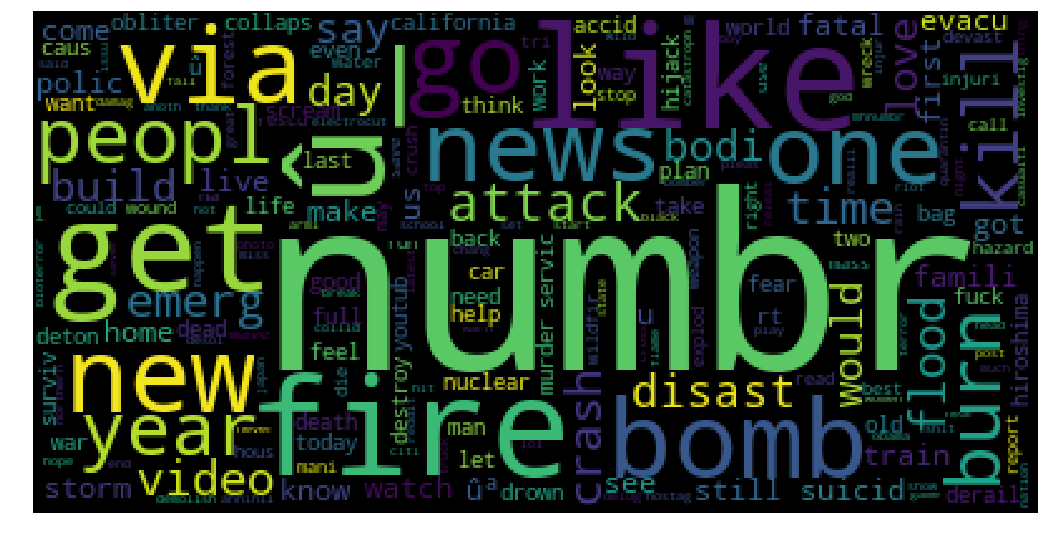

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(all_words)
figure = plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [33]:
# print the total number of words and the 15 most common words
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))

Number of words: 16827
Most common words: [('numbr', 3455), ('like', 591), ('fire', 534), ('û_', 508), ('get', 456), ('bomb', 337), ('new', 329), ('via', 325), ('one', 296), ('go', 291), ('news', 288), ('peopl', 286), ('burn', 258), ('year', 253), ('kill', 253)]


In [34]:
# use the 2000 most common words as features
word_features = list(all_words.keys())[:2500]

In [35]:
# The find_features function will determine which of the 2000 word features are contained in the review
def find_features(message):
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

# # Lets see an example!
# features = find_features(processed[0])
# for key, value in features.items():
#     if value == True:
#         print (key)

In [36]:
import numpy as np
# Now lets do it for all the reviews
print(processed.shape)
clean = processed[:train.shape[0]]
print(clean.shape)
messages = list(zip(clean, classes))
test = processed[train.shape[0]:]
print(test.shape)

# define a seed for reproducibility
seed = 1
np.random.seed = seed
#shuffle so that both reviews get mix
np.random.shuffle(messages)

# call find_features function for each reviews
featuresets = [(find_features(text), label) for (text, label) in messages]

(10876,)
(7613,)
(3263,)


In [37]:
# we can split the featuresets into training and testing datasets using sklearn
from sklearn import model_selection

# split the data into training and testing datasets
training, testing = model_selection.train_test_split(featuresets, test_size = 0.15, random_state=seed)

In [38]:
print(len(training))
print(len(testing))

6471
1142


In [39]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [40]:
# We can use sklearn algorithms in NLTK
from nltk.classify.scikitlearn import SklearnClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("always", ConvergenceWarning)

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Define models to train
names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "SGD Classifier",
         "Naive Bayes", "Neural Net", "AdaBoost"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators = 100),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    MLPClassifier(alpha=1),
     AdaBoostClassifier( n_estimators = 100)
    
]

models = zip(names, classifiers)
names1 = []
results = []

for name, model in models:
    nltk_model = SklearnClassifier(model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model, testing)*100
    print("{} Accuracy: {}".format(name, accuracy))
    names1.append(name)
    results.append(accuracy)

K Nearest Neighbors Accuracy: 69.35201401050787
Decision Tree Accuracy: 67.77583187390543
Random Forest Accuracy: 74.5183887915937
SGD Classifier Accuracy: 75.3940455341506
Naive Bayes Accuracy: 76.4448336252189
Neural Net Accuracy: 78.02101576182136
AdaBoost Accuracy: 74.43082311733801


In [42]:
# Ensemble methods - Voting classifier
from sklearn.ensemble import VotingClassifier

names = [ "Random Forest", "SGD Classifier",
         "Naive Bayes","Neural Net", "AdaBoost"]

classifiers = [
    RandomForestClassifier(n_estimators = 100),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    MLPClassifier(alpha=1),
    AdaBoostClassifier()
]

models = list(zip(names, classifiers))

nltk_ensemble = SklearnClassifier(VotingClassifier(estimators = models, voting = 'hard', n_jobs = -1))
nltk_ensemble.train(training)
accuracy = nltk.classify.accuracy(nltk_model, testing)*100
print("Voting Classifier: Accuracy: {}".format(accuracy))

Voting Classifier: Accuracy: 74.43082311733801


In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
import string
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [45]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['text'])

# Print total number of vocab words
print (len(bow_transformer.vocabulary_))

27711


In [46]:
review10 = df['text'][:9]
print (review10)

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
7    I'm on top of the hill and I can see a fire in...
8    There's an emergency evacuation happening now ...
Name: text, dtype: object


In [47]:
reviews_bow = bow_transformer.transform(clean)

In [48]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(reviews_bow)

In [49]:
reviews_tfidf = tfidf_transformer.transform(reviews_bow)
print (reviews_tfidf.shape)

(7613, 27711)


In [50]:
reviews_bow_test = bow_transformer.transform(test)
tfidf_transformer_test = TfidfTransformer().fit(reviews_bow_test)
reviews_tfidf_test = tfidf_transformer_test.transform(reviews_bow_test)
print (reviews_tfidf_test.shape)

(3263, 27711)


In [51]:
# train model with ML algo
from sklearn.naive_bayes import MultinomialNB
review_detect_model = MLPClassifier(alpha=1).fit(reviews_tfidf, train['target'])

In [52]:
all_predictions = review_detect_model.predict(reviews_tfidf)
print (all_predictions)

[0 1 0 ... 1 1 1]


In [53]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(train['target'], all_predictions))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      4342
           1       0.89      0.64      0.74      3271

    accuracy                           0.81      7613
   macro avg       0.83      0.79      0.80      7613
weighted avg       0.82      0.81      0.80      7613



In [54]:
all_predictions1 = review_detect_model.predict(reviews_tfidf_test)
print (all_predictions1[:10])

[1 0 1 0 1 0 0 0 0 0]


In [55]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(clean, train['target'], test_size=0.2)

print (len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

6090 1523 7613


In [56]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier',  LogisticRegression(n_jobs=1, C=1e5)),  # train on TF-IDF vectors w/ Neural Net
])

In [57]:
model = pipeline.fit(msg_train,label_train)

C:\Users\vibhu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [58]:
predictions = pipeline.predict(msg_test)

In [59]:
print (classification_report(predictions,label_test))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       857
           1       0.74      0.73      0.73       666

    accuracy                           0.77      1523
   macro avg       0.77      0.77      0.77      1523
weighted avg       0.77      0.77      0.77      1523



In [60]:
print(test[:10])

0                             happen terribl car crash
1        heard earthquak differ citi stay safe everyon
2    forest fire spot pond gees flee across street ...
3                       apocalyps light spokan wildfir
4             typhoon soudelor kill numbr china taiwan
5                                      shake earthquak
6        probabl still show life arsen yesterday eh eh
7                                                  hey
8                                             nice hat
9                                                 fuck
Name: text, dtype: object


In [61]:
pd.DataFrame(
    confusion_matrix(predictions, label_test),
    index = [['actual', 'actual'], ['positive', 'negative']],
    columns = [['predicted', 'predicted'], ['positive', 'negative']])

predicted         
                 positive negative
actual positive       690      167
       negative       183      483

In [62]:
predictions1 = pipeline.predict(test)

In [63]:
print(predictions1[:10])

[1 1 1 1 1 1 0 0 0 0]


In [64]:
sample_sub=pd.read_csv('sample_submission.csv')

In [65]:
y_pre=pipeline.predict(test)
print(y_pre[2])
y_pre=np.round(y_pre).astype(int).reshape(3263)
print(y_pre[2])
sub=pd.DataFrame({'id':sample_sub['id'].values.tolist(),'target':y_pre})
sub.to_csv('submission1.csv',index=False)

1
1


In [66]:
sub.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [67]:
import pickle

In [68]:
pickle.dump(model, open('model_txt.pkl','wb'))

In [69]:
model1 = pickle.load(open('model_txt.pkl','rb'))
print(model1.predict([["Forest fire near La Ronge Sask. Canada"]]))

[1]
